# Import Dependencies

In [148]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [207]:
training_dir = "D:/ML_Dataset/bite_size/training"
testing_dir = "D:/ML_Dataset/bite_size/test"
logs_dir = "logs"

# Load And Preprocess Data

In [150]:
data = tf.keras.utils.image_dataset_from_directory(training_dir)
data = data.map(lambda x, y: (x / 255.0, y))

data_iterator = data.as_numpy_iterator()

Found 11030 files belonging to 2 classes.


In [151]:
batch = data_iterator.next()

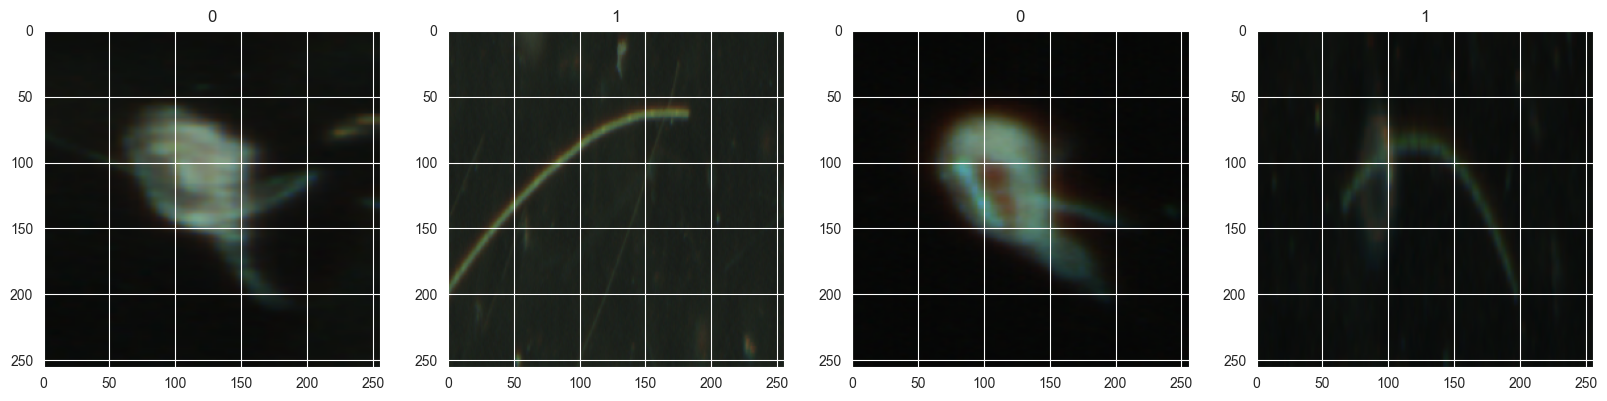

In [152]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [153]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)+1
test_size = int(len(data) * 0.1)

assert train_size + val_size + test_size == len(data)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Building the Model

In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.regularizers import l2

In [177]:
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [180]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │    15,745,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,748,305 (60.08 MB)

 Trainable params: 15,748,305 (60.08 MB)

 Non-trainable params: 0 (0.00 B)

In [161]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs_dir)

In [181]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - accuracy: 0.9448 - loss: 0.7593 - val_accuracy: 0.9759 - val_loss: 0.1831
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - accuracy: 0.9789 - loss: 0.1903 - val_accuracy: 0.9924 - val_loss: 0.1615
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - accuracy: 0.9856 - loss: 0.1608 - val_accuracy: 0.9915 - val_loss: 0.1555
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.9866 - loss: 0.1639 - val_accuracy: 0.9906 - val_loss: 0.1115
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - accuracy: 0.9853 - loss: 0.1509 - val_accuracy: 0.9902 - val_loss: 0.1260
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.9852 - loss: 0.1739 - val_accuracy: 0.9866 - val_loss: 0.1500
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.9867 - loss: 0.1534 - val_accuracy: 0.9786 - val_loss: 0.1513
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.9856 - loss: 0

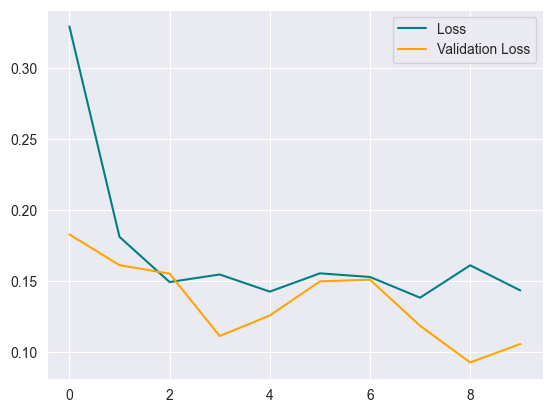

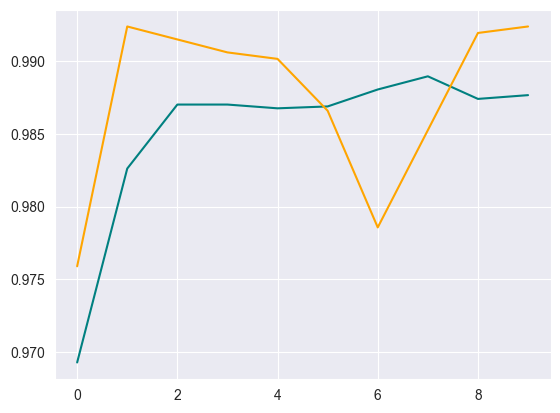

In [184]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="Loss")
plt.plot(hist.history["val_loss"], color="orange", label="Validation Loss")
plt.legend()
plt.show()

plt.plot(hist.history["accuracy"], color="teal", label="Accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="Validation Accuracy")
plt.show()

# Evaluation


In [185]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [186]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [190]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(f"Precision: {pre.result().numpy():.2f}, Recall: {re.result().numpy():.2f}, Accuracy: {acc.result().numpy():.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

# Test

In [193]:
import cv2

In [208]:
path = "D:/ML_Dataset/processed/testing/fs446_eggs_roi3.2768170400.tif.png"
img = cv2.imread(f"{testing_dir}/fs446_eggs_roi3.2768170400.tif.png")
resized = tf.image.resize(img, (256, 256))
yhat = model.predict